In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
dt=pd.read_csv('Crop_recommendation.csv')

In [5]:
dt.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [7]:
dt.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [8]:
dt.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [9]:
dt.shape

(2200, 8)

In [10]:
dt.duplicated().sum()

0

In [11]:
lab=dt['label']

In [12]:
lb=lab.value_counts()

<Axes: xlabel='label', ylabel='count'>

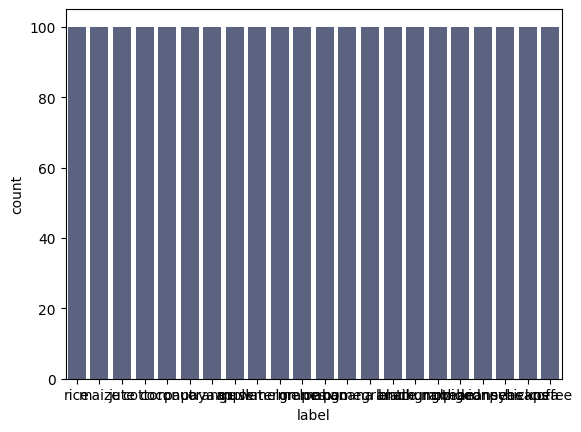

In [13]:
sns.barplot(data=lb,color='#565f87')

In [14]:
dt.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [15]:
dts=dt.drop(['label'],axis=1)

In [16]:
dts.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall'], dtype='object')

In [17]:
cordt=dts.corr()

In [18]:
cordt

,N,P,K,temperature,humidity,ph,rainfall
N,1.000000,-0.231460,-0.140512,0.026504,0.190688,0.096683,0.059020
P,-0.231460,1.000000,0.736232,-0.127541,-0.118734,-0.138019,-0.063839
K,-0.140512,0.736232,1.000000,-0.160387,0.190859,-0.169503,-0.053461
temperature,0.026504,-0.127541,-0.160387,1.000000,0.205320,-0.017795,-0.030084
humidity,0.190688,-0.118734,0.190859,0.205320,1.000000,-0.008483,0.094423
ph,0.096683,-0.138019,-0.169503,-0.017795,-0.008483,1.000000,-0.109069
rainfall,0.059020,-0.063839,-0.053461,-0.030084,0.094423,-0.109069,1.000000


<Axes: >

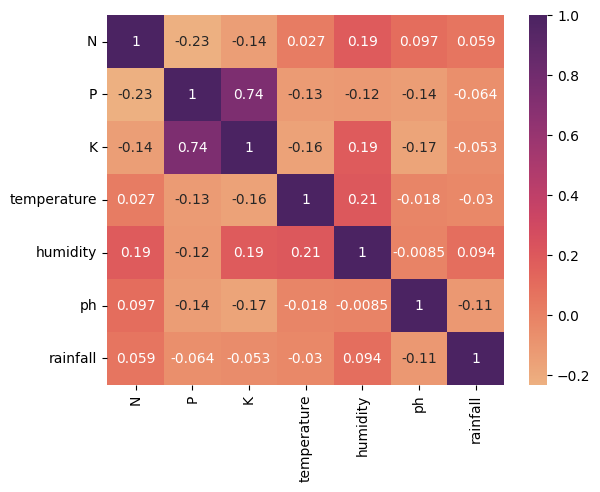

In [19]:
sns.heatmap(cordt,annot=True,cbar=True,cmap='flare')

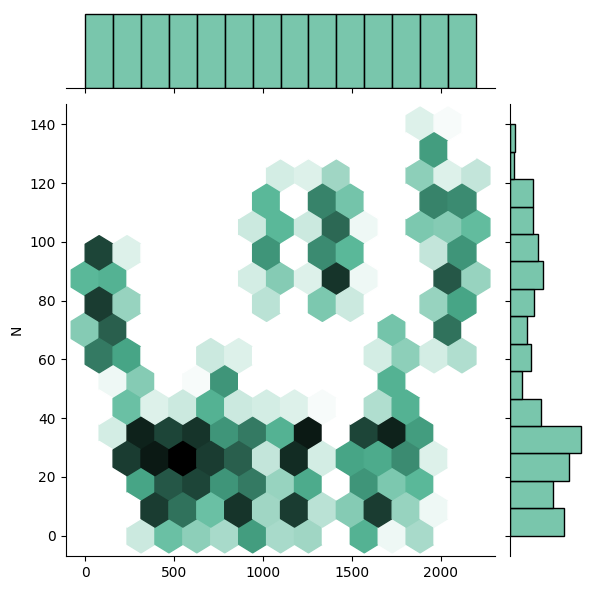

In [20]:
sns.jointplot(dt['N'],color="#4CB391", kind="hex")

In [21]:
cropdict = {
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

In [22]:
dt['cropnum']=dt['label'].map(cropdict)

In [23]:
dt.head()

,N,P,K,temperature,humidity,ph,rainfall,label,cropnum
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice,1
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice,1
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice,1
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice,1
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice,1


In [24]:
dt=dt.drop('label',axis=1)

In [25]:
dt.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'cropnum'], dtype='object')

In [26]:
x=dt.drop('cropnum',axis=1)

In [27]:
x

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340
...,...,...,...,...,...,...,...
2195,107,34,32,26.774637,66.413269,6.780064,177.774507
2196,99,15,27,27.417112,56.636362,6.086922,127.924610
2197,118,33,30,24.131797,67.225123,6.362608,173.322839
2198,117,32,34,26.272418,52.127394,6.758793,127.175293


In [28]:
y=dt['cropnum']

In [29]:
y

0        1
1        1
2        1
3        1
4        1
        ..
2195    22
2196    22
2197    22
2198    22
2199    22
Name: cropnum, Length: 2200, dtype: int64

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1760, 7)
(1760,)
(440, 7)
(440,)


In [33]:
x_train

,N,P,K,temperature,humidity,ph,rainfall
1656,17,16,14,16.396243,92.181519,6.625539,102.944161
752,37,79,19,27.543848,69.347863,7.143943,69.408782
892,7,73,25,27.521856,63.132153,7.288057,45.208411
1041,101,70,48,25.360592,75.031933,6.012697,116.553145
1179,0,17,30,35.474783,47.972305,6.279134,97.790725
...,...,...,...,...,...,...,...
1638,10,5,5,21.213070,91.353492,7.817846,112.983436
1095,108,94,47,27.359116,84.546250,6.387431,90.812505
1130,11,36,31,27.920633,51.779659,6.475449,100.258567
1294,11,124,204,13.429886,80.066340,6.361141,71.400430


In [34]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
1451,101,17,47,29.494014,94.729813,6.185053,26.308209
1334,98,8,51,26.179346,86.522581,6.259336,49.430510
1761,59,62,49,43.360515,93.351916,6.941497,114.778071
1735,44,60,55,34.280461,90.555616,6.825371,98.540477
1576,30,137,200,22.914300,90.704756,5.603413,118.604465
...,...,...,...,...,...,...,...
59,99,55,35,21.723831,80.238990,6.501698,277.962619
71,67,45,38,22.727910,82.170688,7.300411,260.887506
1908,121,47,16,23.605640,79.295731,7.723240,72.498009
1958,116,52,19,22.942767,75.371706,6.114526,67.080226


In [35]:
from sklearn.metrics import accuracy_score

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
log=LogisticRegression()
log.fit(x_train,y_train)
log

c:\Users\nandh\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [38]:
logy=log.predict(x_test)

In [39]:
Log=accuracy_score(y_test,logy)

In [40]:
from sklearn.naive_bayes import GaussianNB
gau=GaussianNB()

In [41]:
ga=gau.fit(x_train, y_train)
ga

GaussianNB()

In [42]:
gap=ga.predict(x_test)

In [43]:
gag=accuracy_score(y_test,gap)

In [44]:
from sklearn.svm import SVC
s=SVC()

In [45]:
sv=s.fit(x_train,y_train)
sv

SVC()

In [46]:
svp=sv.predict(x_test)

In [47]:
svvv=accuracy_score(y_test,svp)

In [48]:
from sklearn.neighbors import KNeighborsClassifier
k=KNeighborsClassifier()

In [49]:
kf=k.fit(x_train,y_train)
kf

KNeighborsClassifier()

In [50]:
knp=kf.predict(x_test)

In [51]:
kna=accuracy_score(y_test,knp)

In [52]:
from sklearn.tree import DecisionTreeClassifier
dec=DecisionTreeClassifier()

In [53]:
decf=dec.fit(x_train,y_train)
decf

DecisionTreeClassifier()

In [54]:
decp=decf.predict(x_test)

In [55]:
deca=accuracy_score(y_test,decp)

In [56]:
from sklearn.tree import ExtraTreeClassifier
ex=ExtraTreeClassifier()

In [57]:
exf=ex.fit(x_train,y_train)
exf

ExtraTreeClassifier()

In [58]:
exp=exf.predict(x_test)

In [59]:
exa=accuracy_score(y_test,exp)

In [60]:
from sklearn.ensemble import RandomForestClassifier
ran=RandomForestClassifier()

In [61]:
ranf=ran.fit(x_train,y_train)
ranf

RandomForestClassifier()

In [62]:
ranp=ranf.predict(x_test)

In [63]:
rana=accuracy_score(y_test,ranp)

In [64]:
from sklearn.ensemble import BaggingClassifier
bag=BaggingClassifier()

In [65]:
bagf=bag.fit(x_train,y_train)
bagf

BaggingClassifier()

In [66]:
bagp=bagf.predict(x_test)

In [67]:
baga=accuracy_score(y_test,bagp)

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
gbc=GradientBoostingClassifier()

In [69]:
gbcf=gbc.fit(x_train,y_train)
gbcf

GradientBoostingClassifier()

In [70]:
gbcp=gbcf.predict(x_test)

In [71]:
gbca=accuracy_score(y_test,gbcp)

In [72]:
from sklearn.ensemble import AdaBoostClassifier
adbc=AdaBoostClassifier()

In [73]:
adbf=adbc.fit(x_train,y_train)
adbf

AdaBoostClassifier()

In [74]:
adbp=adbf.predict(x_test)

In [75]:
adpa=accuracy_score(y_test,adbp)

In [76]:
f={
    'score':[Log,gag,svvv,kna,deca,exa,rana,baga,gbca,adpa]
}
dfr=pd.DataFrame(f,index=['LogisticRegression','GaussianNB','svm','KNeighborsClassifier','DecisionTreeClassifier','ExtraTreeClassifier','RandomForestClassifier','BaggingClassifier','GradientBoostingClassifier','AdaBoostClassifier'])
print(dfr)

                               score
LogisticRegression          0.945455
GaussianNB                  0.995455
svm                         0.961364
KNeighborsClassifier        0.970455
DecisionTreeClassifier      0.981818
ExtraTreeClassifier         0.909091
RandomForestClassifier      0.993182
BaggingClassifier           0.990909
GradientBoostingClassifier  0.981818
AdaBoostClassifier          0.140909


<Axes: >

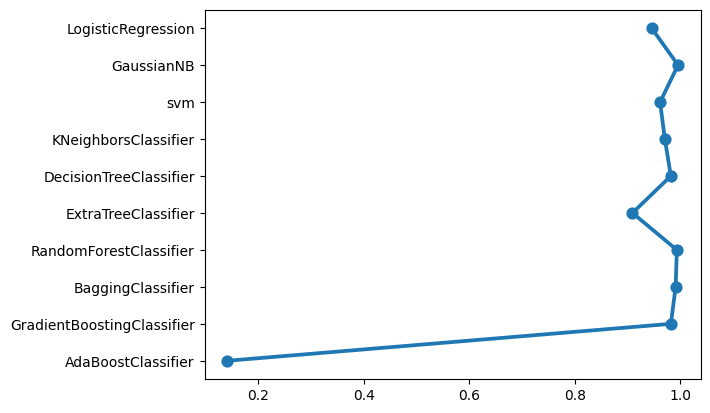

In [95]:
data=[Log,gag,svvv,kna,deca,exa,rana,baga,gbca,adpa]
index=['LogisticRegression','GaussianNB','svm','KNeighborsClassifier','DecisionTreeClassifier','ExtraTreeClassifier','RandomForestClassifier','BaggingClassifier','GradientBoostingClassifier','AdaBoostClassifier']
sns.pointplot(data=dfr,x=data,y=index)

In [ ]:
def values(n,p,k,Temperature,Humidity,Ph,Rainfall):
  N=n
  P=p
  K=k
  temperature=Temperature
  humidity=Humidity
  ph=Ph
  rainfall=Rainfall
  return N,P,K,temperature,humidity,ph,rainfall

Prediction on Best Algorithm

In [ ]:
#Prediction
n=int(input('Enter the Values of N eg-50:'))
p=int(input('Enter the Values of P eg-50:'))
k=int(input('Enter the Values of K eg-60:'))
Temperature=float(input('Enter the Values of temperature eg-40.0 :'))
Humidity=int(input('Enter the Values of humidity eg-20:'))
Ph=int(input('Enter the Values of ph eg-100:'))
Rainfall=int(input('Enter the Values of rainfall eg-100:'))
print(f'we got best accuracy on GaussianNB is {gag} and RandomForestClassifier is {rana}')
print(f'choose the algorithm\n1.GaussianNB\n2.RandomForestClassifier')
V=values(n,p,k,Temperature,Humidity,Ph,Rainfall)
f=np.array([[V[0],V[1],V[2],V[3],V[4],V[5],V[6]]])
pcdg=gbcf.predict(f).reshape(1,-1)
pcda=ranf.predict(f).reshape(-1,1)
cropdict = {
  1: "Rice", 2: "Maize", 3: "Jute", 4: "Cotton", 5: "Coconut", 6: "Papaya", 7: "Orange",
                8: "Apple", 9: "Muskmelon", 10: "Watermelon", 11: "Grapes", 12: "Mango", 13: "Banana",
                14: "Pomegranate", 15: "Lentil", 16: "Blackgram", 17: "Mungbean", 18: "Mothbeans",
                19: "Pigeonpeas", 20: "Kidneybeans", 21: "Chickpea", 22: "Coffee"
                }
for i in pcdg:
  for j in i:
    if j in cropdict:
      cr=cropdict[j]
for i in pcda:
  for j in i:
    if j in cropdict:
      cra=cropdict[j]
while True:
  cho=int(input('Choose The Choice:'))
  if cho==1:
    print(f'{cr} is a best crop to be cultivated')
  else:
    print(f'{cra} is a best crop to be cultivated')
  do=input('Do You Want to Continue (y/Press any other key to exit):')
  dl=do.lower()
  if dl =='y':
    continue
  else:
    print('Thank You')
    break

Enter the Values of N eg-50:60
Enter the Values of P eg-50:70
Enter the Values of K eg-60:90
Enter the Values of temperature eg-40.0 :90
Enter the Values of humidity eg-20:30
Enter the Values of ph eg-100:50
Enter the Values of rainfall eg-100:50


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but GradientBoostingClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


we got best accuracy on GaussianNB is 0.9954545454545455 and RandomForestClassifier is 0.9931818181818182
choose the algorithm
1.GaussianNB
2.RandomForestClassifier
Choose The Choice:1
Papaya is a best crop to be cultivated
Do You Want to Continue (y/Press any other key to exit):y
Choose The Choice:2
Chickpea is a best crop to be cultivated
Do You Want to Continue (y/Press any other key to exit):y
Choose The Choice:1
Papaya is a best crop to be cultivated
Do You Want to Continue (y/Press any other key to exit):y
Choose The Choice:2
Chickpea is a best crop to be cultivated
Do You Want to Continue (y/Press any other key to exit):p
Thank You
